<a href="https://colab.research.google.com/github/Ara2697/Research-heart-sound/blob/main/Copy_of_liang_imple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
%matplotlib inline

from itertools import cycle
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
audio_files = glob('/content/201108011114.wav') #heartsound challange
y, sr = librosa.load(audio_files[0],sr=4410)

In [ ]:
audio_files_1=glob('/content/e01052.wav') #Physionet
y, sr = librosa.load(audio_files_1[0],sr=4410) #working with pysionet

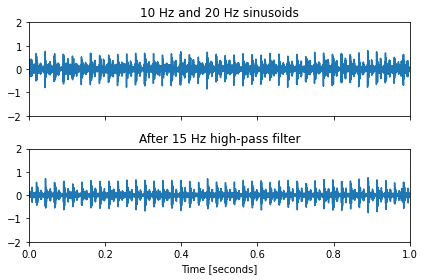

In [ ]:
t = np.linspace(0, 1,y.shape[0], False)
sig = y
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

sos = ss.butter(10,55, 'lp', fs=4410, output='sos')
filtered = ss.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

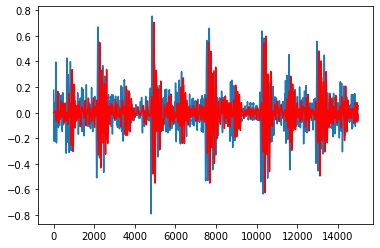

In [ ]:
plt.plot(y[1:15000])
plt.plot(filtered[1:15000],'r')

# Normalize

In [ ]:
def vec_nor(x):
    """
    Normalize the amplitude of a vector from -1 to 1
    """
    nVec = np.zeros(len(x));		   # Initializate derivate vector
    nVec = np.divide(x, max(x))
    nVec = nVec-np.mean(nVec);
    nVec = np.divide(nVec,np.max(nVec));

    return nVec

In [ ]:
def vec_nor2(x):
    """
    Normalize the amplitude of a vector from -1 to 1
    """
    nVec = np.zeros(len(x));		   # Initializate derivate vector
    nVec = np.divide(x, max(x))

    return nVec

In [ ]:
norm_v=vec_nor(filtered)

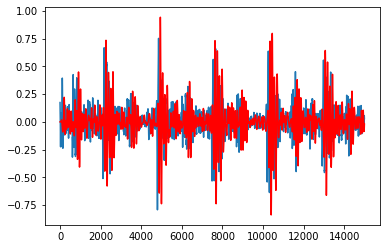

In [ ]:
plt.plot(y[1:15000])
plt.plot(norm_v[1:15000],'r')

# shanon


In [ ]:
def shannonE_vector3(x):
    """
    Shannon energy of an input signal
    """

    y = x*x
    return y
def absulate (x):
    y=abs(x)
    return y
def shannonE_vector (x):
    """
    Shannon energy of an input signal
    """
    mu = -(x**2)*np.log(x**2)/x.shape[0]
    y = -(((x**2)*np.log(x**2)) - mu)/np.std(x)
    return y

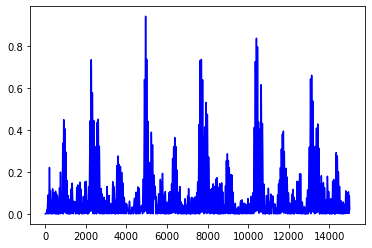

In [ ]:
absu=abs(norm_v)
Shan_energy=shannonE_vector(norm_v)
Shan_energy_1=shannonE_vector3(norm_v)
# plt.plot(Shan_energy[1:15000],'r')
plt.plot(absu[1:15000],'b')
# plt.plot(Shan_energy_1[1:15000],'y')

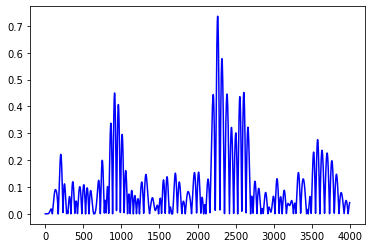

In [ ]:
plt.plot(absu[1:4000],'b')

In [ ]:
from scipy.signal import find_peaks

In [ ]:
#x and y arrays
x = np.linspace(0, absu.shape[0], num=absu.shape[0])
yy= absu

In [ ]:
#Find peaks
# peaks = find_peaks(yy, height =0, threshold = .25, distance = 1500)
peaks = find_peaks(yy, height =0, distance = 1000)
height = peaks[1]['peak_heights'] #list containing the height of the peaks
peak_pos = x[peaks[0]]   #list containing the positions of the peaks

In [ ]:
height

array([0.44997463, 0.73578476, 0.27646066, 0.94352435, 0.36410762,
       0.73757926, 0.28681061, 0.83837612, 0.39526852, 0.66175385,
       0.29237196, 0.75407524, 0.27157278, 0.83892106, 0.39963622,
       0.79407453, 0.3732698 , 0.79972254, 0.35485502, 0.79974981,
       0.2908183 , 0.86729384, 0.32480558, 0.87643085, 0.30014278,
       0.9084985 , 0.31126473, 0.8087875 , 0.30698384, 0.8426384 ,
       0.33047078, 0.843614  , 0.34971966, 0.8790131 , 0.4404422 ,
       0.78947038, 0.32031856, 0.72999406, 0.30817716, 0.93977913,
       0.36239544, 0.75329909, 0.38151409, 0.71190638, 0.32151868,
       0.75440619, 0.25914797, 0.84387819, 0.36659962, 0.79974891,
       0.31559591, 0.85050831, 0.33056426, 0.73107693, 0.35225107,
       0.81826603, 0.2754588 , 0.84763978, 0.37812284, 0.84037969,
       0.40621119, 0.68956184, 0.30951991, 0.82362477, 0.30400806,
       0.89295842, 0.43567236, 0.87788132, 0.40563402, 0.86935258,
       0.43660163, 0.81158598, 0.33029538, 0.92349904, 0.34969

In [ ]:
#Find minima
y2 = yy*-1
minima = find_peaks(y2)
min_pos = x[minima[0]]   #list containing the positions of the minima
min_height = y2[minima[0]]   #list containing the height of the minima

In [ ]:
min_pos.shape

(2138,)

In [ ]:
yy.shape

(113598,)

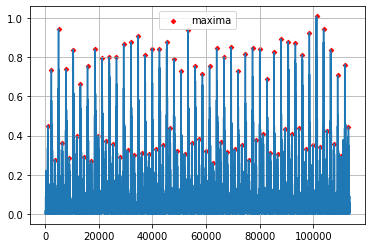

In [ ]:
#Plotting the function + peaks and minima
fig = plt.figure()
ax = fig.subplots()
ax.plot(x,yy)
ax.scatter(peak_pos, height, color = 'r', s = 10, marker = 'D', label = 'maxima')
#ax.scatter(min_pos, min_height*-1, color = 'gold', s = 10, marker = 'X', label = 'minima')
ax.legend()
ax.grid()
plt.show()

# peak for a a portion

In [ ]:
x = np.linspace(0, absu[0:6500].shape[0], num=absu[0:6500].shape[0])
yyp= absu[0:6500]


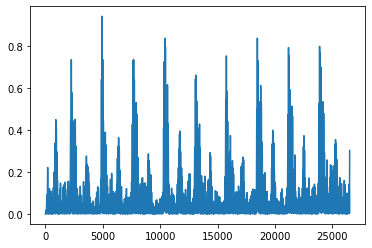

In [ ]:
plt.plot(absu[0:26500])

In [ ]:
#Find peaks
# peaks = find_peaks(yy, height =0, threshold = .25, distance = 1500)
peaks = find_peaks(yyp, height =0, distance = 1200)
height = peaks[1]['peak_heights'] #list containing the height of the peaks
peak_pos = x[peaks[0]]   #list containing the positions of the peaks

In [ ]:
#Find minima
y2 = yyp*-1
minima = find_peaks(y2)
min_pos = x[minima[0]]   #list containing the positions of the minima
min_height = y2[minima[0]]   #list containing the height of the minima

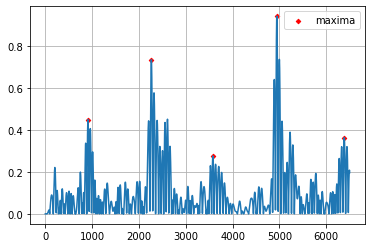

In [ ]:
#Plotting the function + peaks and minima
fig = plt.figure()
ax = fig.subplots()
ax.plot(x,yyp)
ax.scatter(peak_pos, height, color = 'r', s = 10, marker = 'D', label = 'maxima')
#ax.scatter(min_pos, min_height*-1, color = 'gold', s = 10, marker = 'X', label = 'minima')
ax.legend()
ax.grid()
plt.show()

# S1,S2 ,systole diastole

In [ ]:
def maxDiff(arr, arr_size):
    max_diff = arr[1] - arr[0]
    sa=0
    sa2=0
    for i in range( arr_size-1 ):
            if(arr[i+1] - arr[i] > max_diff):
                max_diff = arr[i+1] - arr[i]
                sa=arr[i+1]
                sa2=arr[i]
    return max_diff,sa,sa2

In [ ]:
Diasole,S2,S1=maxDiff(peak_pos,peak_pos.shape[0])
Diasole,S2,S1

(1440.2215725496235, 6384.982304969996, 4944.760732420373)

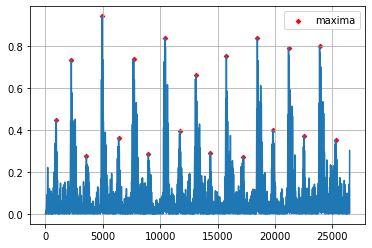

In [ ]:
#Plotting the function + peaks and minima
fig = plt.figure()
ax = fig.subplots()
ax.plot(x,yyp)
ax.scatter(peak_pos, height, color = 'r', s = 11, marker = 'D', label = 'maxima')
# ax.scatter(min_pos, min_height*-1, color = 'gold', s = 10, marker = 'X', label = 'minima')
ax.legend()
ax.grid()
plt.show()

In [ ]:
def findpos(peak_pos_list):
  peak_pos1  =peak_pos_list.index(S2)

  return peak_pos1

peak_pos1=findpos(peak_pos_list)


In [ ]:
HS_1=np.zeros(math.ceil(peak_pos1/2))
HS_2=np.zeros(math.floor(peak_pos1/2))

NameError: ignored

In [ ]:
def getting(zz,HS_1,HS_2,peak_pos):
  z=math.ceil(zz/2)

  i=0
  j=2
  for i in range( z):
    if(i==0):
        np.insert(HS_2, 0, peak_pos[zz-i])
        np.insert(HS_1, 0, peak_pos[zz-i-1])
    else:
        np.insert(HS_2, 0, peak_pos[zz-i-j])
        np.insert(HS_1, 0, peak_pos[zz-i-j-1])
        j=j+2
  i=0
  for i in range(z-1):
        print(peak_pos[zz+i+1+1])
        HS_2=np.append(HS_2,peak_pos[zz+i+1+1])
        HS_1=np.append(HS_1,peak_pos[zz+i+1])

  return HS_1,HS_2

HS_1,HS_2=getting(peak_pos1,HS_1,HS_2,peak_pos)

19799.7471602702
21175.79908675799
22518.84976791577
23879.901128344467
25267.953507679536


In [ ]:
HS_1 = np.array(HS_1)
HS_2 = np.array(HS_2)

In [ ]:

HS_1#first sound postion


array([ 8973.33861655, 10405.39265633, 11732.44273369, 13125.49530171,
       14334.54092607, 15764.59489037, 18462.69670554, 19799.74716027,
       21175.79908676, 22518.84976792, 23879.90112834, 18462.69670554,
       19799.74716027, 21175.79908676, 22518.84976792, 23879.90112834])

In [ ]:
HS_2#second sound postion

array([10405.39265633, 11732.44273369, 13125.49530171, 14334.54092607,
       15764.59489037, 17211.64949621, 19799.74716027, 21175.79908676,
       22518.84976792, 23879.90112834, 25267.95350768, 19799.74716027,
       21175.79908676, 22518.84976792, 23879.90112834, 25267.95350768])